In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm
import seaborn as sns

In [98]:
train_dataset = pd.read_json("./data/iceberg/train.json/data/processed/train.json")
test_dataset = pd.read_json("./data/iceberg/test.json/data/processed/test.json")


In [99]:
train_dataset

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0
...,...,...,...,...,...
1599,04e11240,"[-30.999878, -29.976866, -28.233906, -29.50732...","[-27.847719, -28.233864, -24.712077999999998, ...",na,0
1600,c7d6f6f8,"[-25.31155, -26.511555, -28.694487, -27.180115...","[-29.563713, -28.290375, -26.839405, -28.29046...",na,0
1601,bba1a0f1,"[-18.141895, -18.141844, -19.01737, -19.701599...","[-25.305355, -29.387701, -28.963863, -26.16023...",na,0
1602,7f66bb44,"[-22.455633, -25.794661, -26.954567, -22.83354...","[-26.070356, -22.093737, -21.577662, -24.53376...",na,0


In [100]:
test_dataset

,id,band_1,band_2,inc_angle
0,5941774d,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",34.966400
1,4023181e,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",32.615072
2,b20200e4,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",37.505433
3,e7f018bb,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",34.473900
4,4371c8c3,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",43.918874
...,...,...,...,...
8419,16ee9b50,"[-25.082357, -26.71583, -24.599827, -25.082571...","[-25.860718, -23.29442, -25.860861, -25.334354...",34.795500
8420,5a599eb7,"[-21.031391143798828, -21.031391143798828, -21...","[-23.755836486816406, -23.755836486816406, -23...",32.246683
8421,df30d6dd,"[-28.609278, -26.514626, -26.514679, -26.83061...","[-28.609278, -29.437183, -30.35239, -31.375494...",39.503200
8422,18af95b1,"[-27.068821, -27.068892, -23.970854, -22.38730...","[-29.991381, -29.163599, -24.886002, -27.71266...",33.638000


In [101]:
train_dataset['band_1'] = train_dataset['band_1'].apply(lambda x: np.array(x).reshape(75, 75))
train_dataset['band_2'] = train_dataset['band_2'].apply(lambda x: np.array(x).reshape(75, 75))
test_dataset['band_1'] = test_dataset['band_1'].apply(lambda x: np.array(x).reshape(75, 75))
test_dataset['band_2'] = test_dataset['band_2'].apply(lambda x: np.array(x).reshape(75, 75))

train_dataset['inc_angle'] = pd.to_numeric(train_dataset['inc_angle'], errors='coerce')
test_dataset['inc_angle'] = pd.to_numeric(test_dataset['inc_angle'], errors='coerce')

train = train_dataset.sample(frac=0.8, random_state=42, axis=0)
val = train_dataset[~train_dataset.isin(train)].dropna()

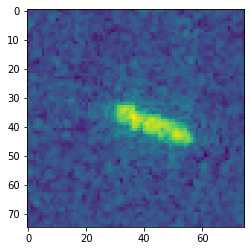

In [102]:
plt.imshow(train_dataset['band_1'].iloc[100]) #只要圖片大小對了就讀的出來
# .iloc[100]跟[100]能達到一樣效果 

In [103]:
len(train_dataset['band_1'].iloc[100].ravel())

5625

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   2.,   0.,   4.,   0.,   4.,   0.,   8.,   7.,
          2.,  14.,   0.,  19.,   0.,  17.,  20.,   0.,  21.,  22.,   0.,
         24.,  38.,   0.,  34.,  45.,  52.,   0.,  45.,  72.,  74.,  80.,
          0.,  79.,  81.,  83., 105.,  90.,  94., 129., 104., 103., 106.,
        119., 152., 129., 126., 112., 112., 123., 113., 265., 106., 105.,
         98., 228.,  88., 103., 220., 102.,  77., 169.,  70., 144.,  62.,
        116.,  43.,  87.,  91.,  32.,  72.,  55.,  32.,  48.,  39.,  38.,
         36.,  25.,  31.,  19.,  17.,  17.,  16.,  15.,  17.,   9.,  19.,
          9.,   7.,   7.,   4.,   8.,   3.,   9.,   6.,   5.,   9.,   4.,
          2.,   2.,   5.,   5.,   5.,   4.,   3.,   3.,   2.,   2.,   2.,
          7.,   0.,   5.,   3.,   7.,   2.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   4.,   1.,   1.,   0.,   1.,   0.,   2.,   1.,   4.,
          0.,   2.,   1.,   3.,   3., 

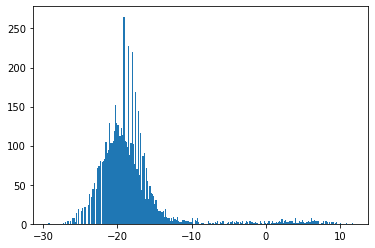

In [104]:
plt.hist(train_dataset['band_1'].iloc[100].ravel(), bins=256)
#.ravel()把原本的array攤平


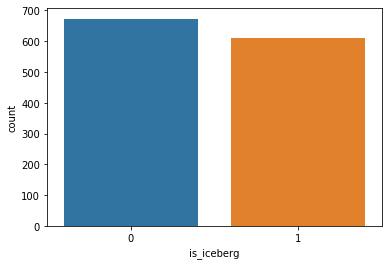

In [105]:
sns.countplot(x="is_iceberg",data=train)

In [106]:
# 看看圖片
def plot_sample(df, idx):
    c = ( 'Not Hotdog', 'Hotdog')
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    ax1.imshow(df['band_1'].iloc[idx])
    ax2.imshow(df['band_2'].iloc[idx])
    ax3.hist(df['band_1'].iloc[idx].ravel(), bins=256, fc='k', ec='k')
    ax4.hist(df['band_2'].iloc[idx].ravel(), bins=256, fc='k', ec='k')
    f.set_figheight(10)
    f.set_figwidth(10)
    plt.suptitle(c[df['is_iceberg'].iloc[idx]])
    plt.show()

In [107]:
 torch.tensor

<function _VariableFunctionsClass.tensor>

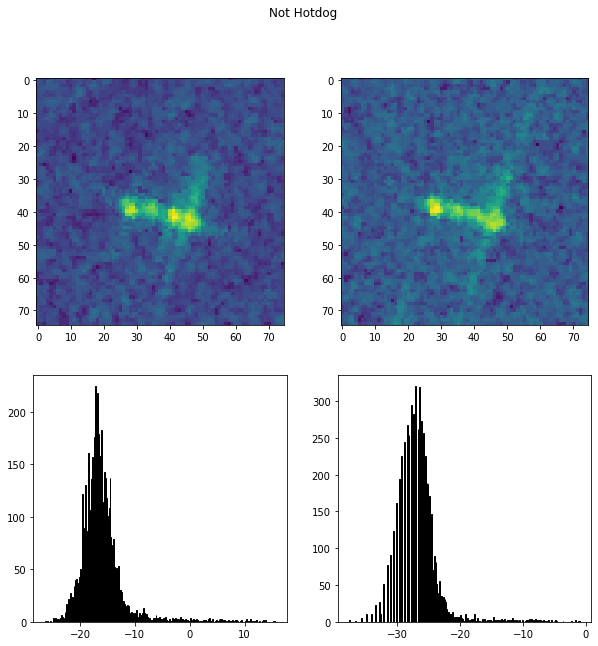

In [108]:
plot_sample(train, 700)


In [109]:
band_1_tr = np.concatenate([im for im in train['band_1']]).reshape(-1, 75, 75)
band_2_tr = np.concatenate([im for im in train['band_2']]).reshape(-1, 75, 75)
full_img_tr = np.stack([band_1_tr, band_2_tr], axis=1)

band_1_val = np.concatenate([im for im in val['band_1']]).reshape(-1, 75, 75)
band_2_val = np.concatenate([im for im in val['band_2']]).reshape(-1, 75, 75)
full_img_val = np.stack([band_1_val, band_2_val], axis=1)

band_1_test = np.concatenate([im for im in test_dataset['band_1']]).reshape(-1, 75, 75)
band_2_test = np.concatenate([im for im in test_dataset['band_2']]).reshape(-1, 75, 75)
full_img_test = np.stack([band_1_test, band_2_test], axis=1)

In [110]:
train_imgs = torch.from_numpy(full_img_tr).float()
train_targets = torch.from_numpy(train['is_iceberg'].values).long()
train_dataset = TensorDataset(train_imgs, train_targets)

val_imgs = torch.from_numpy(full_img_val).float()
val_targets = torch.from_numpy(val['is_iceberg'].values).long()
val_dataset = TensorDataset(val_imgs, val_targets)


test_imgs  = torch.from_numpy(full_img_test).float()

In [111]:
train_dataset[0]


(tensor([[[-22.6230, -19.0423, -18.2574,  ..., -18.4807, -16.2613, -17.4456],
          [-20.8639, -21.9415, -18.5852,  ..., -17.6429, -15.8457, -15.3719],
          [-19.1604, -18.8107, -19.1606,  ..., -19.4081, -15.6848, -14.5650],
          ...,
          [-16.6924, -19.1614, -21.1594,  ..., -17.1585, -20.1761, -20.8714],
          [-19.0432, -19.1615, -19.2814,  ..., -18.8180, -20.3107, -22.1143],
          [-17.0582, -17.9424, -18.4755,  ..., -17.1585, -21.3168, -21.9489]],
 
         [[-23.3626, -22.6231, -23.9621,  ..., -20.5854, -21.3158, -20.5856],
          [-22.4475, -24.3858, -24.8314,  ..., -20.8702, -21.1648, -19.4083],
          [-24.3857, -25.5456, -24.1714,  ..., -21.9477, -21.0163, -21.1649],
          ...,
          [-24.8321, -23.9629, -24.1723,  ..., -23.5652, -23.9693, -23.1793],
          [-23.1727, -25.7984, -26.3251,  ..., -21.3167, -21.3168, -20.5866],
          [-23.7585, -23.5589, -22.9861,  ..., -23.7649, -25.3083, -23.9694]]]),
 tensor(1))

In [112]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.batch = nn.BatchNorm2d(2)
        self.conv1 = nn.Conv2d(2, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 18 * 18, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.batch(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [113]:
net = Net()


In [114]:
epochs = 2
criterion = nn.CrossEntropyLoss()
optimizer = Adam(net.parameters())

In [121]:
# utils 
class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self, window_size=None):
        self.length = 0
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        self.window_size = window_size

    def reset(self):
        self.length = 0
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        if self.window_size and (self.count >= self.window_size):
            self.reset()
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
def accuracy(y_true, y_pred):
    y_true = y_true.float()
    _, y_pred = torch.max(y_pred, dim=-1)
    return (y_pred.float() == y_true).float().mean()
    
def fit(train, val, epochs, batch_size):
    print('train on {} images validate on {} images'.format(len(train), len(val)))
    net.train()
    train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val, batch_size=batch_size, shuffle=False)
    for epoch in tqdm_notebook(range(epochs), total=epochs):
        running_loss = AverageMeter()
        running_accuracy = AverageMeter()
        val_loss_meter = AverageMeter()
        val_acc_meter = AverageMeter()
        pbar = tqdm_notebook(train_loader, total=len(train_loader))
        for data, target in pbar:
            data, target = Variable(data), Variable(target)
            output = net(data)
            loss = criterion(output, target)
            acc = accuracy(target.data, output.data)
            running_loss.update(loss.data[0])
            running_accuracy.update(acc)
            pbar.set_description("[ loss: {:.4f} | acc: {:.4f} ] ".format(
                running_loss.avg, running_accuracy.avg))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("[ loss: {:.4f} | acc: {:.4f} ] ".format(running_loss.avg, running_accuracy.avg))
        for val_data, val_target in val_loader:
            val_data, val_target = Variable(val_data), Variable(val_target)
            output = net(val_data)
            val_loss = criterion(output, val_target)
            val_acc = accuracy(val_target.data, output.data)
            val_loss_meter.update(val_loss.data[0])
            val_acc_meter.update(val_acc)
        pbar.set_description("[ loss: {:.4f} | acc: {:.4f} | vloss: {:.4f} | vacc: {:.4f} ] ".format(
        running_loss.avg, running_accuracy.avg, val_loss_meter.avg, val_acc_meter.avg))
        print("[ loss: {:.4f} | acc: {:.4f} | vloss: {:.4f} | vacc: {:.4f} ] ".format(
        running_loss.avg, running_accuracy.avg, val_loss_meter.avg, val_acc_meter.avg))

In [123]:
fit(train_dataset, val_dataset, 3, 32)

train on 1283 images validate on 296 images


C:\Users\jerem\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


C:\Users\jerem\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number

In [124]:
fit(train_dataset, val_dataset, 3, 32)


train on 1283 images validate on 296 images


C:\Users\jerem\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


C:\Users\jerem\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number